# Сборный проект

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, сделали описание проекта. 👍</font>

## Шаг. Открываем файл с данными и изучаем общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Файл состоит из 11 столбцов и 16715 строк**

**Описание данных:**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB

## Шаг. Подготовка данных

In [5]:
df.columns=df.columns.str.lower()

In [6]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Нижний регистр применен, теперь посмотрим дубликаты и каждый столбец на наличие пропусков (где они были)**

### Дубликаты

In [7]:
df.duplicated().sum()

0

**Явных дубликатов не найдено, это хорошо**

### Работа с пропусками

**Выведим количество пропущенных значений для каждого столбца**

In [8]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
display(df['year_of_release'].unique())
display(df['genre'].unique())
display(df['critic_score'].unique())
display(df['user_score'].unique())
display(df['rating'].unique())

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

#### name

In [10]:
df['name'].isnull().sum()

2

In [11]:
df.loc[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Платформа одна и та же, пропусков в этих строках можно, данные почти нулевые, удаляем, на общую картину это не повлеяет**

In [12]:
df=df.dropna(subset=['name'])

#### platform

**platform - пропусков нет, проверим уникальные значения**

In [13]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

#### year_of_release

In [14]:
df['year_of_release'].isnull().sum()

269

In [15]:
df.loc[df['year_of_release'].isnull()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


**Пропусков 269, сначала хотел заменить на среднее, а потом понял, что игра с годом в названии может получить совершенно другое среднее, это будет странно. 269 не такое большое количество данных, удалим**

In [16]:
df=df.dropna(subset=['year_of_release'])

In [17]:
df['year_of_release'].isna().sum()

0

**Поменяем тип данных столбца**

In [18]:
df['year_of_release'] = df['year_of_release'].astype(int)

#### genre

**Для удобства и на всякий случай приведем к нижнему регистру**

In [19]:
df['genre'] = df['genre'].str.lower()

In [20]:
 df['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

In [21]:
df['genre'].isnull().sum()

0

**Было 2 пропуска, видимо они совпали с пропусками в name и были удалены, отлично**

#### critic_score

In [22]:
df['critic_score'].isnull().sum()

8461

In [23]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

**Заменим пропущеные значения на на заглушку -1, в дальнейших расчетах ее не будем использовать**

In [24]:
df.loc[df['critic_score'].isna(), 'critic_score'] = -1

In [25]:
df['critic_score'].unique()

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [26]:
df['critic_score'].isnull().sum()

0

#### user_score

In [27]:
df['user_score'].isnull().sum()

6605

In [28]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [29]:
df['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1         2
0.7       2
2.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

**tbd - "To be announced" (Будет аннонсировано), значит рейтинга нет, приравниваем к заглушке -1 (как и пропуски) и меяем тип на вещественный**

In [30]:
df.loc[(df['user_score'] == 'tbd') | (df['user_score'].isna()), 'user_score'] = -1
df['user_score'] = pd.to_numeric(df['user_score'])

In [31]:
df['user_score'].unique()

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

In [32]:
df['user_score'].isnull().sum()

0

**Отлично! В оценках пользователей и критиков пропусков нет, идем дальше**

#### rating

In [33]:
df['rating'].isna().sum()

6676

In [34]:
df[df['rating'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN
5,Tetris,GB,1989,puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,NaN
9,Duck Hunt,NES,1984,shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,NaN
10,Nintendogs,DS,2005,simulation,9.05,10.95,1.93,2.74,-1.0,-1.0,NaN


In [35]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

**Entertainment Software Rating Board (ESRB)**
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»

**Такого рейтинга как K-A нет, «Kids to Adults» был переименован в «E10+»**

In [36]:
df['rating'] = df['rating'].replace('K-A', 'E10+')

In [37]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1396
EC         8
AO         1
RP         1
Name: rating, dtype: int64

**Мы не сможем понять возрастное ограничение, если не будем знать его точно, для дальнейших расчетов он не нужен, 6676 строк удалять тоже не стоит, так что заменим пропуски на "неопределен"**

In [38]:
df['rating'] = df['rating'].fillna('неопределен')

In [39]:
df['rating'].isnull().sum()

0

#### Формат данных

**После предобработки данных в ячейках, проверим, все ли перевели в корректный формат**

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Фотмат данных корректный**

#### Вывод работы с пропусками

- **Пропуски данных могли быть обусловленны как механическим так и человеческим факторам**
- **Большое количество пропусков в годах випуска и оценках реставрировать не удалось**
- **Теперь представленные данные корректны. Готовы к дальнейшей аналитике**
- **Пропуска в названиях всего 2, возможен человечаский фактор**
- **Пропуска в рейтинге обучловлены тем, что не все игры выпускаются на американский рынок, для которого этот рейтинг и создан**


### Посчитаем суммарные продажи во всех регионах

In [41]:
df['total_sales'] =  df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,-1.0,-1.0,неопределен,40.24
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,-1.0,-1.0,неопределен,31.38
5,Tetris,GB,1989,puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,неопределен,30.26
6,New Super Mario Bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,неопределен,28.31


**На всякий случай сбросим индексацию после предобработки данных**

In [42]:
df.reset_index(drop=True,inplace=True)

**Вывод:**

При предобработке данных:
- Провели предварительный анализ данных.
- Привели названия столбцов к нижнему регистру
- Проверили данные на наличие пропусков
- Обработали пропуска где это возможно: пару пропусков с названием удалили, оценки привели к медиане, а пропуски в рейтинге игр переименовали
- Переименовали платформы в более корректные названия, понятные рядовому обывателю
- Преобразовали данные в нужные типы
- Посчитали суммарные продажи во всех регионах и запишите их в отдельный столбец
- Обновили индексацию данных после предобработки

In [43]:
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## Шаг. Проведите исследовательский анализ данных

### Сколько игр выпускалось в разные годы.

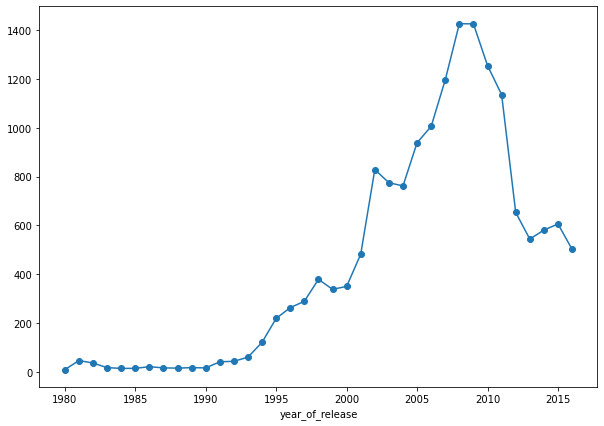

In [44]:
df.groupby('year_of_release')['name'].count().plot(x="year_of_release",style="-o",figsize=(10,7));

In [45]:
games_per_year = df.groupby(['year_of_release'])['name'].count()
games_per_year

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

**Как можем наблюдать большего всего игр выпускалось с 2006 по 2011 года, каждый год больше 1000 игр**

### Как менялись продажи по платформам

In [46]:
df.groupby(['platform'])['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'].sum()

,na_sales,eu_sales,jp_sales,other_sales,total_sales
platform,,,,,
2600,80.78,4.86,0.00,0.84,86.48
3DO,0.00,0.00,0.10,0.00,0.10
3DS,82.65,61.27,100.62,13.27,257.81
DC,5.43,1.69,8.56,0.27,15.95
DS,380.31,188.41,175.02,59.04,802.78
GB,113.64,47.51,85.12,8.16,254.43
GBA,184.12,74.59,46.56,7.61,312.88
GC,131.94,38.32,21.34,5.13,196.73
GEN,19.27,5.52,2.67,0.89,28.35


In [47]:
platform_sales=df.pivot_table(index='platform',values='total_sales',aggfunc=('sum'))

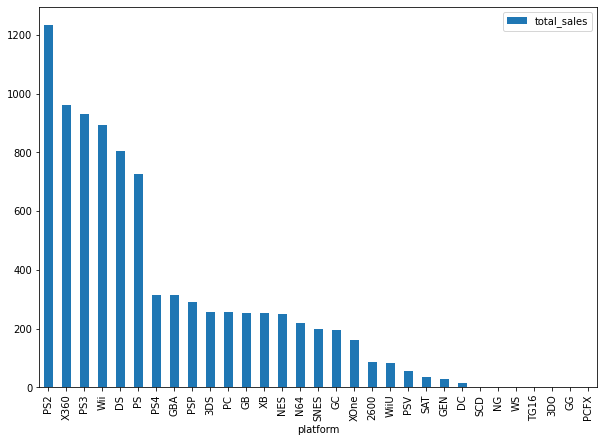

In [48]:
platform_sales.sort_values(by='total_sales',ascending=False).plot(kind='bar',figsize=(10,7));

In [49]:
top_platform_data = df.query("platform == ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']")

In [50]:
top_platform_data.groupby(['platform'])['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'].sum()

,na_sales,eu_sales,jp_sales,other_sales,total_sales
platform,,,,,
DS,380.31,188.41,175.02,59.04,802.78
PS,334.72,212.39,139.78,40.69,727.58
PS2,572.92,332.63,137.54,190.47,1233.56
PS3,390.13,327.21,79.41,134.59,931.34
Wii,486.87,258.32,68.28,77.71,891.18
X360,595.74,268.32,12.30,84.88,961.24


In [51]:
top_platform=top_platform_data.pivot_table(index="year_of_release",columns='platform',values='total_sales',aggfunc=('sum'))

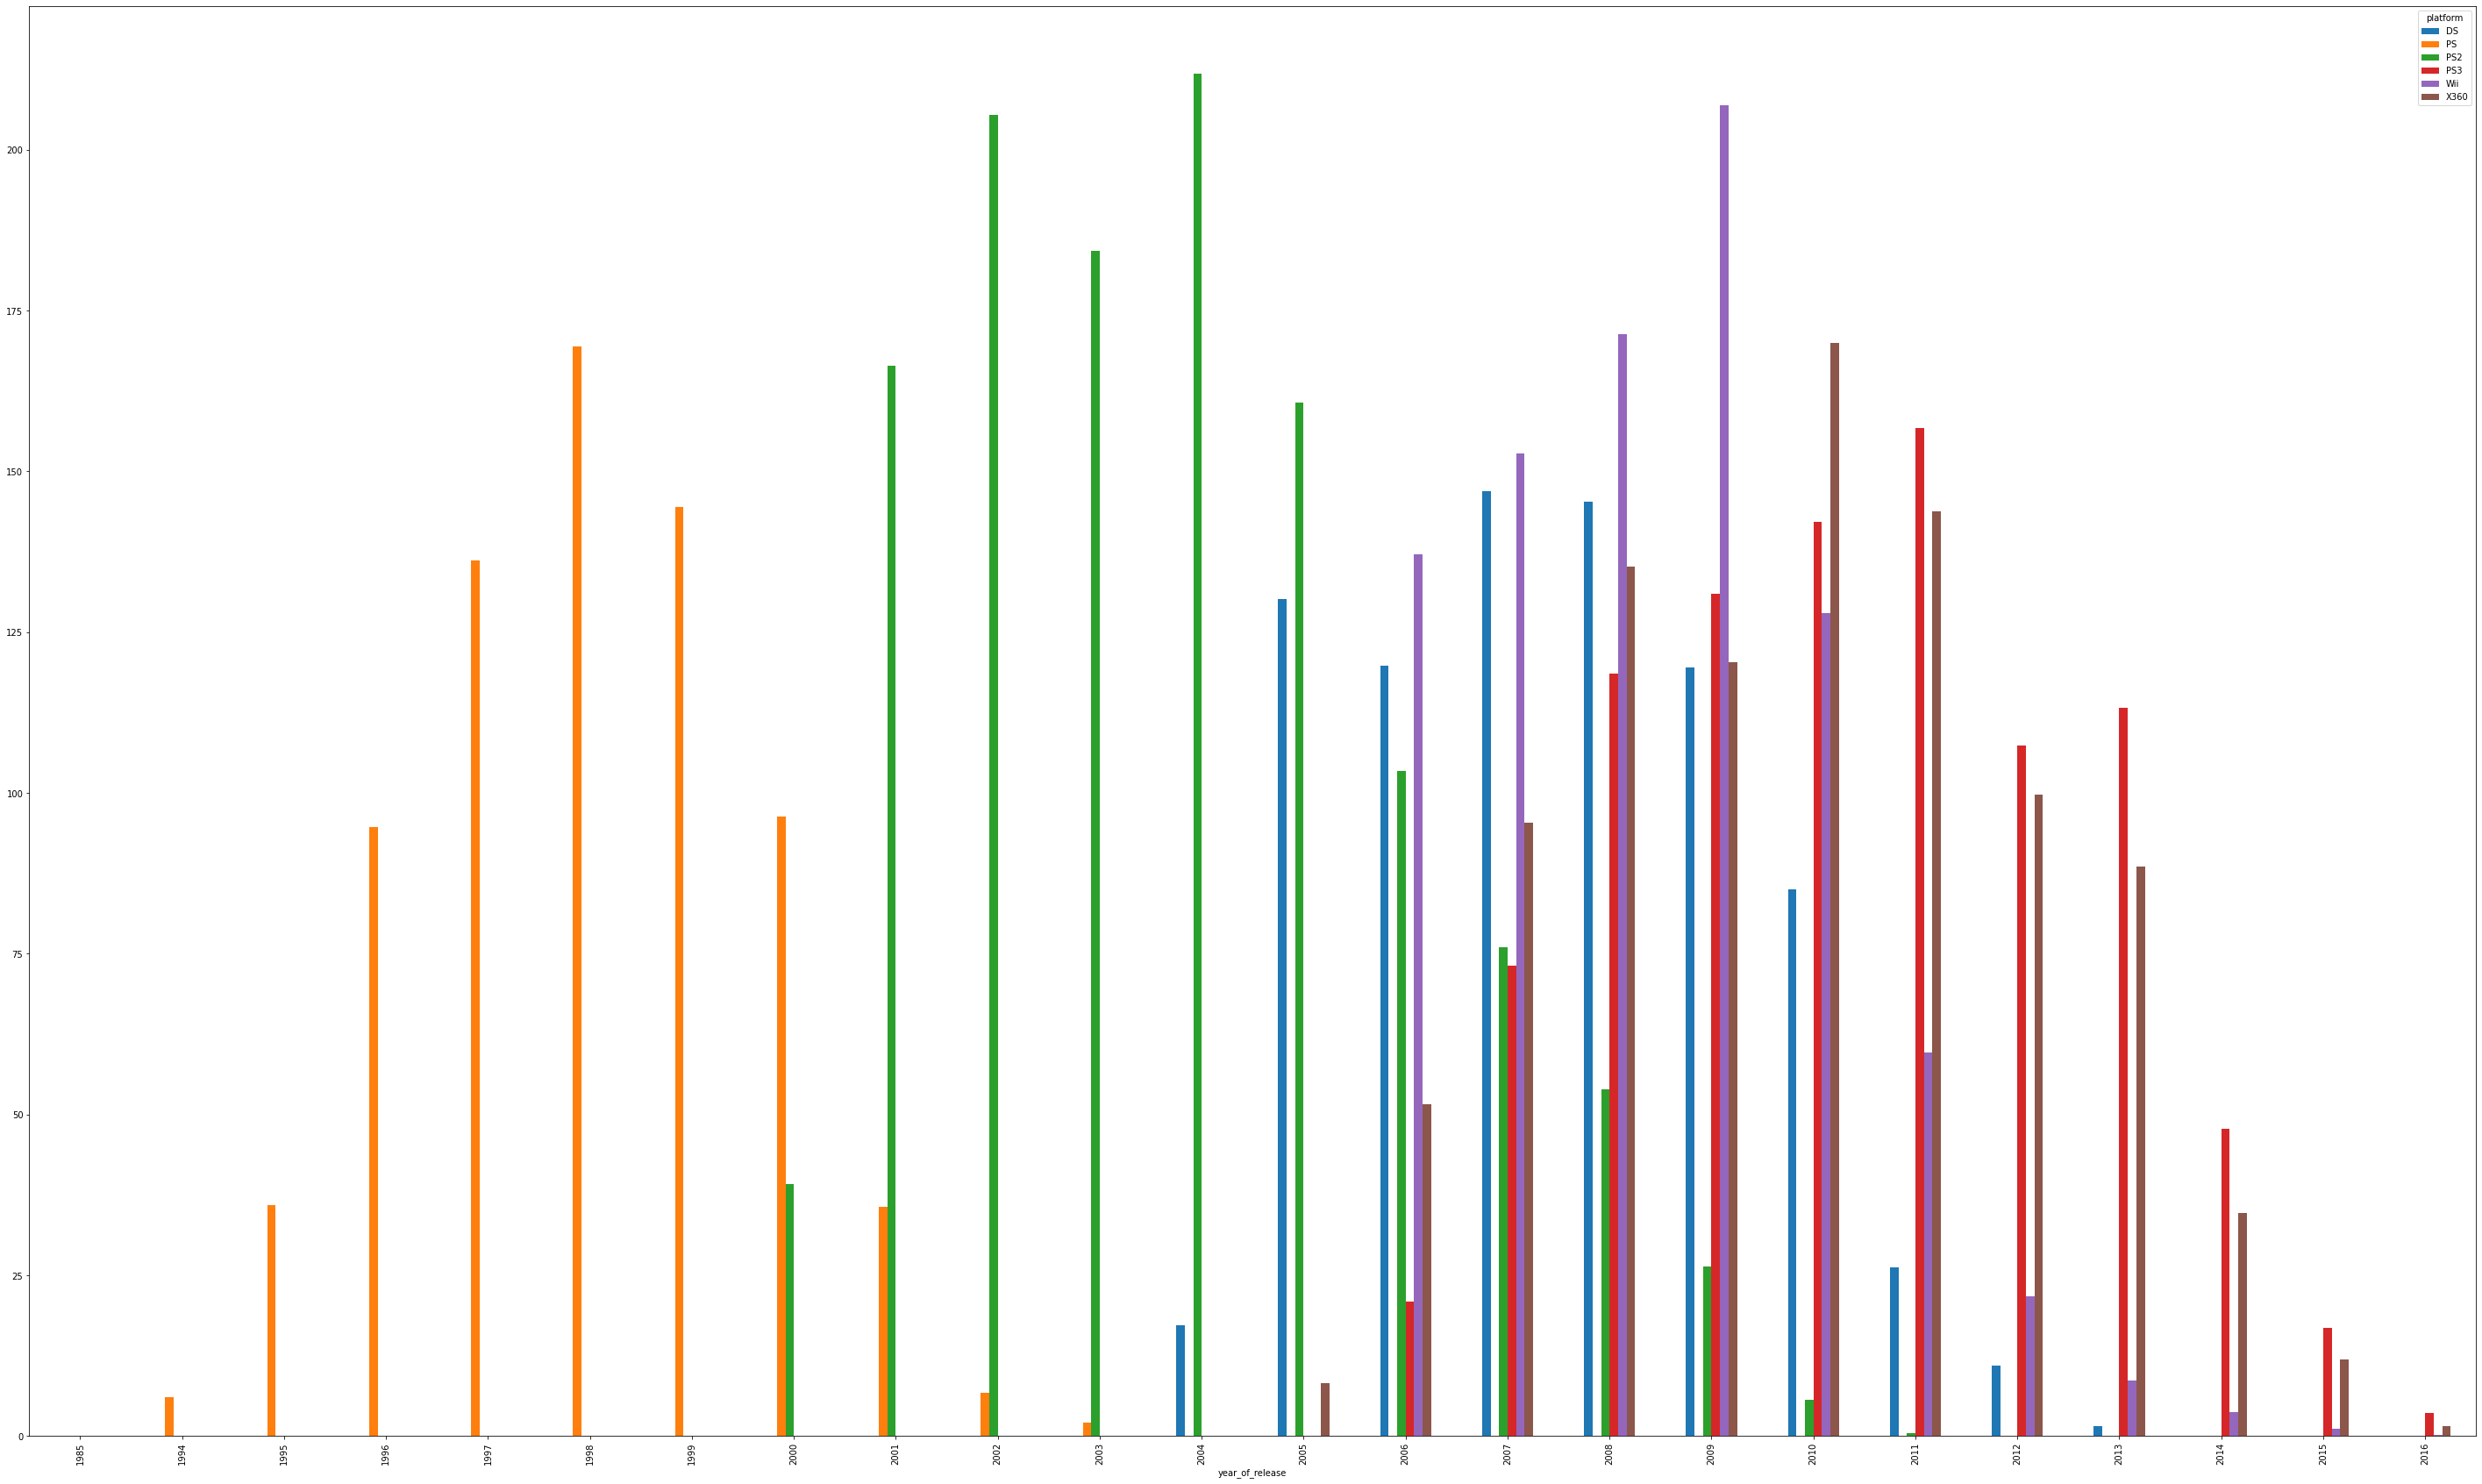

In [52]:
top_platform.sort_values(by='year_of_release',ascending=True).plot(kind='bar',figsize=(50,30));

Платформы на графике:
- Красный - 'PS2'
- Коричневый - 'Xbox 360'
- Фиолетовый - 'PS3'
- Оранжевый - 'Nintendo Wii'
- Синий - 'Nintendo DS'
- Зеленый - 'PS'

**Вывод:**
- Были выделены 5 наиболее прибыльных платформы за все время
- Взят период с 1985 по 2016 года. 
- На графике можно видеть взлеты и падения каждой топовой платформы.
- В среднем период "жизни" платформыв составляет 10 лет
- Пик продаж приходится на середину "жизни" платформы
- На текущий момент все эти платформы устарели и почти не имеют продаж (особенно за 2015 и 2016 года)

### Продажи по платформам за актуальный период

**Как мы выяснили, срок жизни платформы приблизительно 8 лет. Возьмем данные за последние 4 года и выделим платформы, на которых продажи продолжают расти**

In [53]:
actual_platform_data = df.query('year_of_release>=2013')

**Посмотрим на сумарные продажи по платформам от 2008 года**

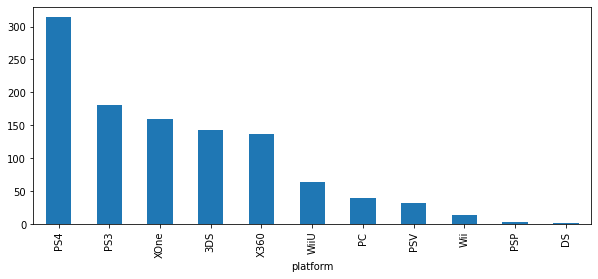

In [54]:
actual_platform_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(figsize=(10,4),kind="bar");


In [55]:
actual_platform=actual_platform_data.pivot_table(index="year_of_release",columns='platform',values='total_sales',aggfunc=('sum'))

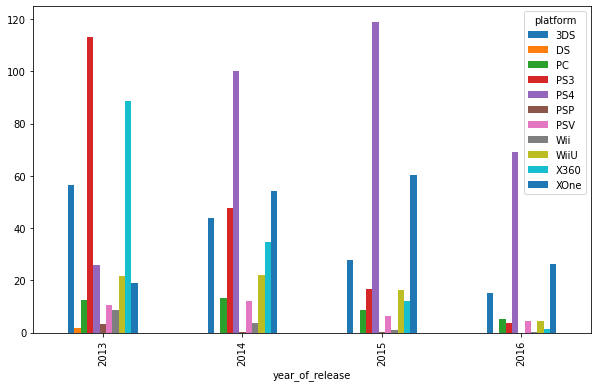

In [56]:
actual_platform.sort_values(by='year_of_release',ascending=True).plot(kind='bar',figsize=(10,6));

**Постороим диаграму размаха по топовым платформам**

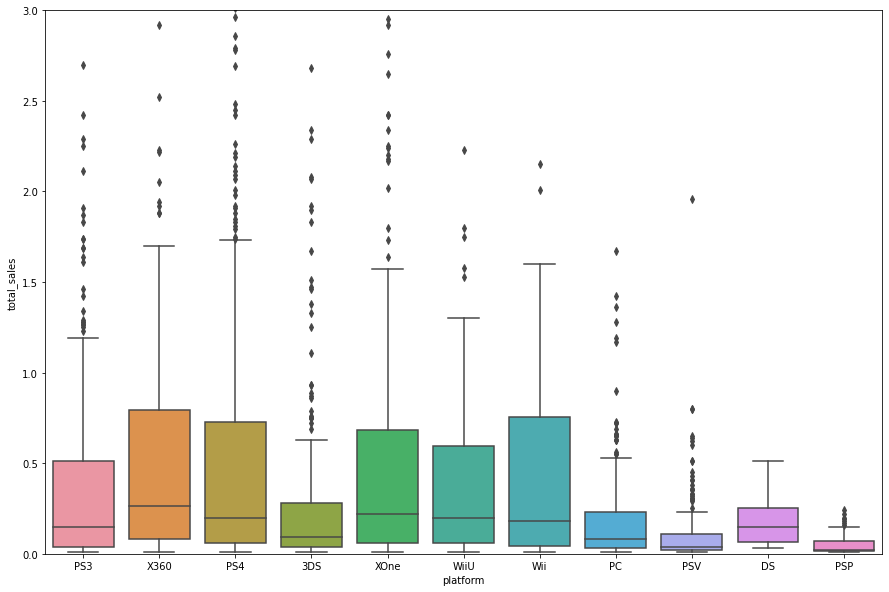

In [57]:
plt.figure(figsize=(15,10))
plt.ylim(0,3)
sns.boxplot(x='platform',y='total_sales',data=actual_platform_data);

Диаграмма межквартального размаха по общим продажам и разбивкой по платформам:

- В ящике с усами можно увидеть, что 3 лучшие платформы очень похожи. 
- PS3 уже начинает отставать. 
- 3DS больше расчитан на рынок Японии, хоть имеет и покупателей по всему миру. У нее третий квартиль меньшем у остальных. 
- Медиана продаж у X360, PS4, XOne почти одинакова. Они все скошены вправо.

In [58]:
actual_platform_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').nlargest(10, 'total_sales')

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


**Вывод:**
- 2016 год характеризуется повсеместным спадом продаж
- На графике видно, что топовые платформы в 2016 году тоже идут на спад
- На графике видно две растущие (лидирующие) платформы: PS4 и Xbox One
- PS4 и Xbox One показывают лучшие продажи, так что они потенциально прибыльные (прогноз на 2017 год)

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

**Еще раз посмотрим на график по продажам на платформах за последние пару лет**

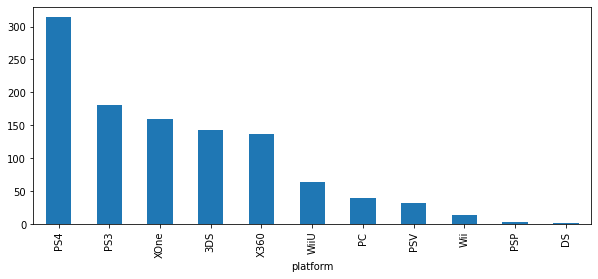

In [59]:
actual_platform_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(figsize=(10,4),kind="bar");


**За последние года лучшей платформой стала PS4, на нее и посмотрим**

**В отзывах пользователей и критиков были пропуски, на которые поставили заглушку -1, избавимся от них**

In [60]:
ps4 = actual_platform_data.query('platform == "PS4"')
user_ps4 = ps4.query('user_score != -1')
critic_ps4 = ps4.query('critic_score != -1')

In [61]:
print(len(actual_platform_data.query('user_score != -1')))
print(len(actual_platform_data.query('critic_score != -1')))
print(len(actual_platform_data.query('(user_score != -1) and (critic_score != -1)')))

1192
991
976


**Построим диаграммы рассеяния и посчитаем корреляцию между отзывами и продажами**

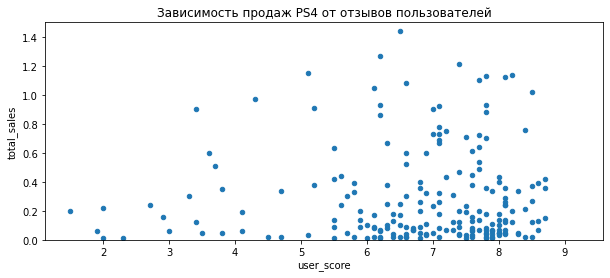

In [62]:
user_ps4.sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='total_sales',figsize=(10,4), ylim=(0, 1.5), title='Зависимость продаж PS4 от отзывов пользователей');

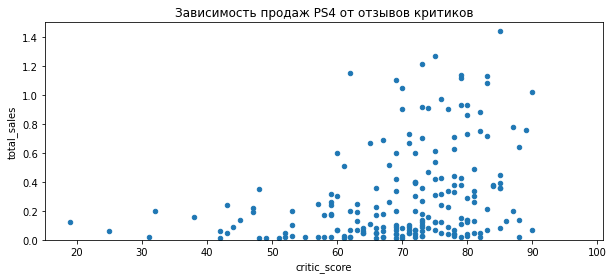

In [63]:
critic_ps4.sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='total_sales',figsize=(10,4), ylim=(0, 1.5),title='Зависимость продаж PS4 от отзывов критиков');


**Корреляция Пирсона между продажами по PS4 и отзывами пользователей**

In [64]:
user_ps4['total_sales'].corr(user_ps4['user_score'])

-0.031957110204556376

**Корреляция Пирсона между продажами по PS4 и отзывами критиков**

In [65]:
critic_ps4['total_sales'].corr(critic_ps4['critic_score'])

0.406567902061781

**Выводы:**
- По графикам видно положительную корреляцию, чем выше оценка - тем больше продаж. 
- В графике пользователей плотнее всего находятся на уровне 6-8 баллов
- В графике критиков плотнее всего находятся на уровне 65-80 баллов
- Корреляция между отзывами и продажами есть
- Обратная корреляция между отзывами пользователей и продажами, даже можно сказать, что близка к нулю
- Прямая корреляция между отзывами критиков и продажами, достаточно влияния, чем выше балл тем больше продаж

### Соотнесем выводы с продажами игр на других платформах

**Используем актуальную дату по всем платформам, чтобы отсеять устаревшие**

In [66]:
actual_platform_data.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


#### Постороим диаграму размаха по всем платформам

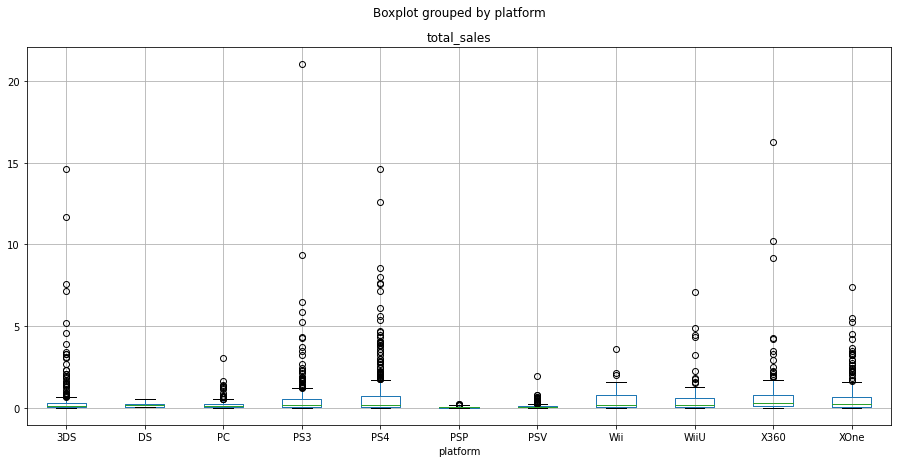

In [67]:
actual_platform_data.boxplot(column='total_sales', by='platform', figsize=(15,7))
plt.show()

- Видем виброс 20млн+ на PS3, достаточно продаваемая игра
- В основном выбросы находятся на уровне 5-10 млн
- В среднем диапазон продаж находятся на отметке 1-5 млн 

**Теперь посмотрим на диаграму без выбросов до 5 млн**

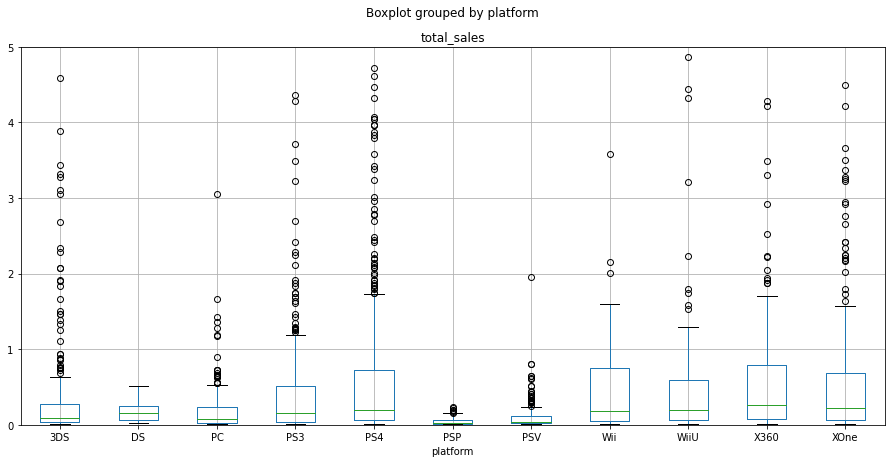

In [68]:
actual_platform_data.boxplot(column='total_sales', by='platform', figsize=(15,7))
plt.ylim(0, 5)
plt.show()

In [69]:
actual_platform_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').nlargest(10, 'total_sales')

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


**После построения диграмы можно сравнить показатели топов платформ и тех, что не попали в рейтинги:**

- Из общего списка можем выделить: PS4, PS3, XOne, 3DS, X360
- Медианы у всех не выходит за пределы 0.5, кроме топовой 3DS, у нее ниже

#### Сравним корреляции и по другим платформам

In [70]:
for platform in ['PS3', 'XOne', '3DS', 'X360']:
    print('\n{0}:'.format(platform))
    for column in ['user_score', 'critic_score']:
        all_plat = actual_platform_data.query('platform == @platform and (user_score != -1) and (critic_score != -1)')
        print('Коэффициент корреляции {0} и total_sales: {1}'.\
              format(column, round(all_plat[column].corr(all_plat['total_sales']), 2)))


PS3:
Коэффициент корреляции user_score и total_sales: 0.02
Коэффициент корреляции critic_score и total_sales: 0.33

XOne:
Коэффициент корреляции user_score и total_sales: -0.09
Коэффициент корреляции critic_score и total_sales: 0.41

3DS:
Коэффициент корреляции user_score и total_sales: 0.27
Коэффициент корреляции critic_score и total_sales: 0.34

X360:
Коэффициент корреляции user_score и total_sales: -0.01
Коэффициент корреляции critic_score и total_sales: 0.35


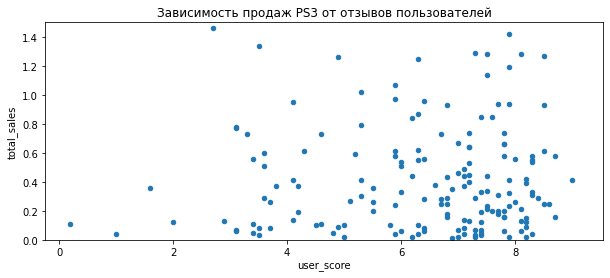

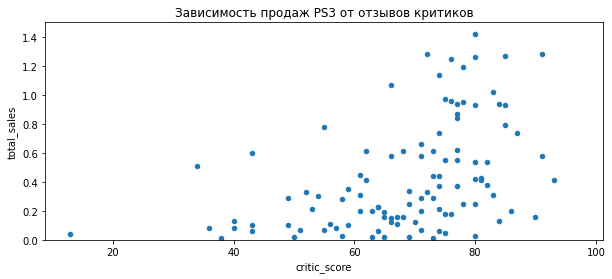

In [71]:
ps3 = actual_platform_data.query('platform == "PS3"')
user_ps3 = ps3.query('user_score != -1')
critic_ps3 = ps3.query('critic_score != -1')
user_ps3.sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='total_sales',figsize=(10,4), ylim=(0, 1.5), title='Зависимость продаж PS3 от отзывов пользователей');
critic_ps3.sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='total_sales',figsize=(10,4), ylim=(0, 1.5),title='Зависимость продаж PS3 от отзывов критиков');

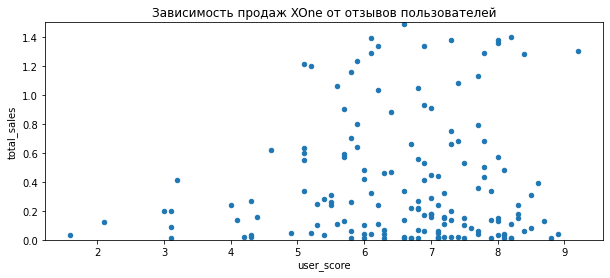

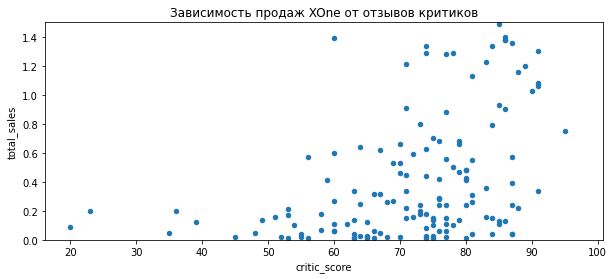

In [72]:
xone = actual_platform_data.query('platform == "XOne"')
user_xone = xone.query('user_score != -1')
critic_xone = xone.query('critic_score != -1')
user_xone.sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='total_sales',figsize=(10,4), ylim=(0, 1.5), title='Зависимость продаж XOne от отзывов пользователей');
critic_xone.sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='total_sales',figsize=(10,4), ylim=(0, 1.5),title='Зависимость продаж XOne от отзывов критиков');

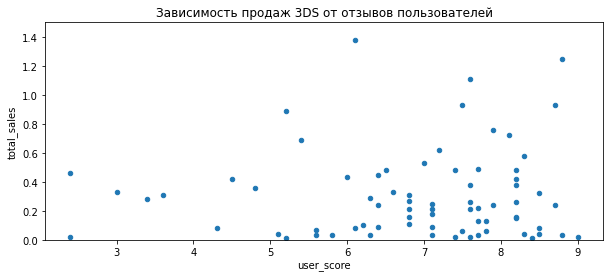

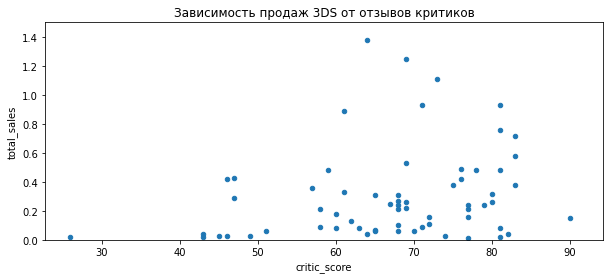

In [73]:
ds = actual_platform_data.query('platform == "3DS"')
user_ds = ds.query('user_score != -1')
critic_ds = ds.query('critic_score != -1')
user_ds.sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='total_sales',figsize=(10,4), ylim=(0, 1.5), title='Зависимость продаж 3DS от отзывов пользователей');
critic_ds.sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='total_sales',figsize=(10,4), ylim=(0, 1.5),title='Зависимость продаж 3DS от отзывов критиков');

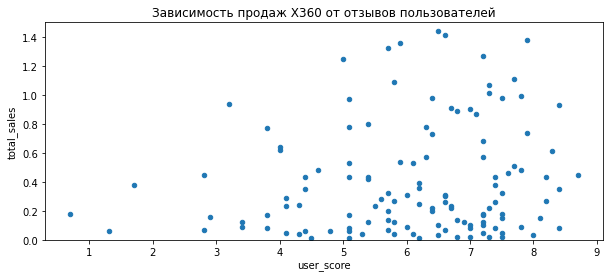

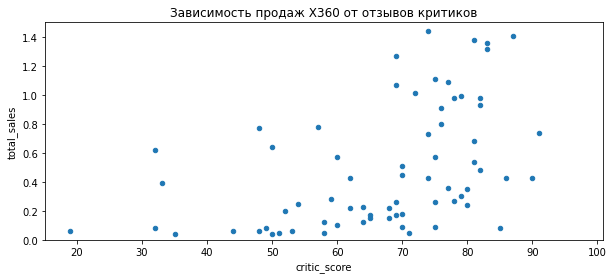

In [74]:
x360 = actual_platform_data.query('platform == "X360"')
user_x360 = x360.query('user_score != -1')
critic_x360 = x360.query('critic_score != -1')
user_x360.sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='total_sales',figsize=(10,4), ylim=(0, 1.5), title='Зависимость продаж X360 от отзывов пользователей');
critic_x360.sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='total_sales',figsize=(10,4), ylim=(0, 1.5),title='Зависимость продаж X360 от отзывов критиков');

#### Выподы по другим платформам

**Как и на PS4, для всех платформ характерно:**
- Отзывы критиков средне влияют на продажи
- Отзывы пользователей не влияют на продажи

### Общее распределение игр по жанрам

In [75]:
median_genre = actual_platform_data.groupby('genre')['total_sales'].median().sort_values(ascending=False)
count_genre = actual_platform_data.groupby('genre')['total_sales'].count().sort_values(ascending=False)

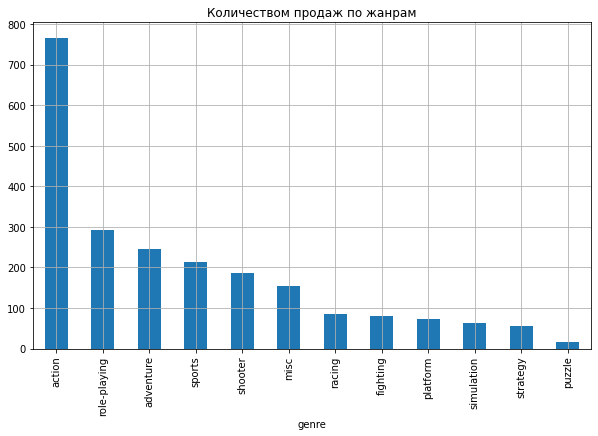

In [76]:
count_genre.plot(y='genre',grid=True,figsize=(10,6),kind='bar',title='Количеством продаж по жанрам');

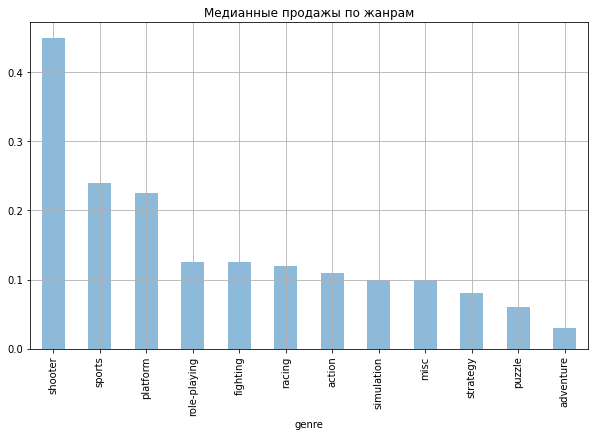

In [77]:
median_genre.plot(y='genre',grid=True,figsize=(10,6),kind='bar',alpha=0.5,title='Медианные продажы по жанрам');

**Вывод:**
- Больше всего покупают игры жанра Action
- Меньше всего покупают Стратегии, пазлы и платформеры
- В плане выручки картина совсем другая
- Больше всего выручки приносят Шутеры и Платформеры, а Action игры оказались на 6 месте

## Шаг. Составьте портрет пользователя каждого региона

**Определим для пользователя каждого региона (NA, EU, JP):**

**За основу возьмем actual_platform_data с данными за последние 8 лет**

### Самые популярные платформы (топ-5)

#### Пользователи из Северной Америки (NA)

In [78]:
na_platform = actual_platform_data.pivot_table(index='platform',values=['na_sales'],aggfunc=('sum'))
na_platform = na_platform.sort_values(by='na_sales',ascending=False).head(5)
na_platform

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


**Самая популярная платформа в Северной Америке - Xbox 360**

#### Пользователи из Европы (EU)

In [79]:
eu_platform = actual_platform_data.pivot_table(index='platform',values=['eu_sales'],aggfunc=('sum'))
eu_platform = eu_platform.sort_values(by='eu_sales',ascending=False).head(5)
eu_platform

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


**Самая популярная платформа в Европе - PS3**

#### Пользователи из Японии (JP)

In [80]:
jp_platform = actual_platform_data.pivot_table(index='platform',values=['jp_sales'],aggfunc=('sum'))
jp_platform = jp_platform.sort_values(by='jp_sales',ascending=False).head(5)
jp_platform

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


**Самая популярная платформа в Японии - Nintendo 3DS**

#### Вывод

- В каждом регионе своя популярная платформа
- Самая популярная платформа в Северной Америке - Xbox 360
- Самая популярная платформа в Европе - PS3
- Самая популярная платформа в Японии - Nintendo 3DS

### Самые популярные жанры (топ-5)

#### Пользователи из Северной Америки (NA)

In [81]:
na_genre = actual_platform_data.pivot_table(index='genre',values=['na_sales'],aggfunc=('sum'))
na_genre = na_genre.sort_values(by='na_sales',ascending=False).head(5)
na_genre

,na_sales
genre,
action,126.05
shooter,109.74
sports,65.27
role-playing,46.40
misc,27.49


**Самый популярный жанр в Северной Америке - Action**

#### Пользователи из Европы (EU)

In [82]:
eu_genre = actual_platform_data.pivot_table(index='genre',values=['eu_sales'],aggfunc=('sum'))
eu_genre = eu_genre.sort_values(by='eu_sales',ascending=False).head(5)
eu_genre

,eu_sales
genre,
action,118.13
shooter,87.86
sports,60.52
role-playing,36.97
racing,20.19


**Самый популярный жанр в Европе - Action**

#### Пользователи из Японии (JP)

In [83]:
jp_genre = actual_platform_data.pivot_table(index='genre',values=['jp_sales'],aggfunc=('sum'))
jp_genre = jp_genre.sort_values(by='jp_sales',ascending=False).head(5)
jp_genre

,jp_sales
genre,
role-playing,51.04
action,40.49
misc,9.20
fighting,7.65
shooter,6.61


**Самый популярный жанр в Японии - Role-Playing**

#### Круговые диаграммы топ жанров по регионам:

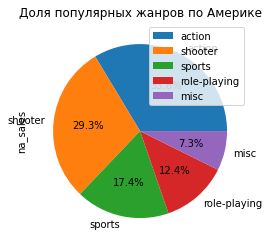

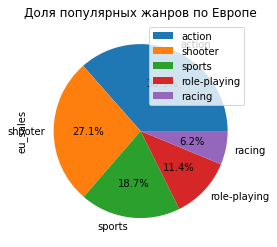

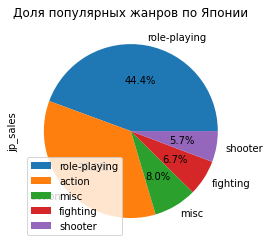

In [84]:
na_genre.plot(kind='pie',y="na_sales", autopct='%1.1f%%', title='Доля популярных жанров по Америке');
eu_genre.plot(kind='pie',y="eu_sales", autopct='%1.1f%%', title='Доля популярных жанров по Европе');
jp_genre.plot(kind='pie',y="jp_sales", autopct='%1.1f%%', title='Доля популярных жанров по Японии');

#### Вывод

- В Америке и Европе самый популярный жанр Action
- В Америке и Европе одинаковый топ5 жанров игр
- В Японии самым популярным оказалось Role-Playing, но Action на втором месте

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Пользователи из Северной Америки (NA)

In [85]:
na_ESRB = actual_platform_data.pivot_table(index='rating',values=['na_sales'],aggfunc=('sum'))
na_ESRB = na_ESRB.sort_values(by='na_sales',ascending=False)
na_ESRB

,na_sales
rating,
M,165.21
неопределен,89.42
E,79.05
E10+,54.24
T,49.79


#### Пользователи из Европы (EU)

In [86]:
eu_ESRB = actual_platform_data.pivot_table(index='rating',values=['eu_sales'],aggfunc=('sum'))
eu_ESRB = eu_ESRB.sort_values(by='eu_sales',ascending=False)
eu_ESRB

,eu_sales
rating,
M,145.32
E,83.36
неопределен,78.91
E10+,42.69
T,41.95


#### Пользователи из Японии (JP)

In [87]:
jp_ESRB = actual_platform_data.pivot_table(index='rating',values=['jp_sales'],aggfunc=('sum'))
jp_ESRB = jp_ESRB.sort_values(by='jp_sales',ascending=False)
jp_ESRB

,jp_sales
rating,
неопределен,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


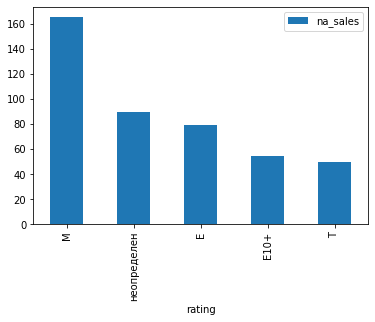

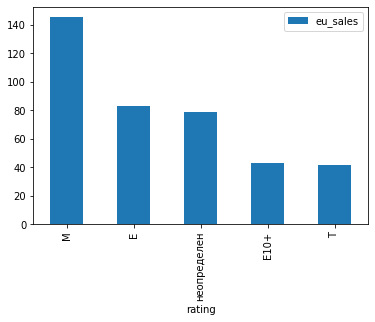

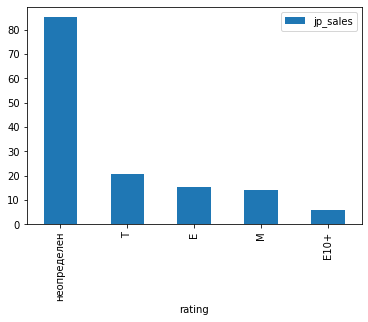

In [88]:
na_ESRB.plot(kind='bar');
eu_ESRB.plot(kind='bar');
jp_ESRB.plot(kind='bar');

#### Вывод

- В Америке и Европе 1 и 2 место почти равны
- В Америке и Европе лидируют рейтинги «E» (Для всех) и «M» (Для взрослых)
- В Японии «E» (Для всех) находится тоже на втором месте
- В Японии на первом месте игры, которые не получили рейтинг, в японии илидируют именно японские платформы, так что скорее всего это игры нацелены на японский рынок

## Шаг. Проверьте гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Гипотезы:**
- Нулевая гипотеза: cредний пользовательский рейтинг платформы Xbox One и PC равны.
- Альтернативная гипотеза: cредний пользовательский рейтинг платформы Xbox One и PC не равны.

In [89]:
from scipy import stats as st

**Создаем даты для каждой платформы отдельно**

In [90]:
Xbox_data = actual_platform_data.query('platform=="XOne" and (user_score != -1) and (critic_score != -1)')
PC_data = actual_platform_data.query('platform=="PC" and (user_score != -1) and (critic_score != -1)')

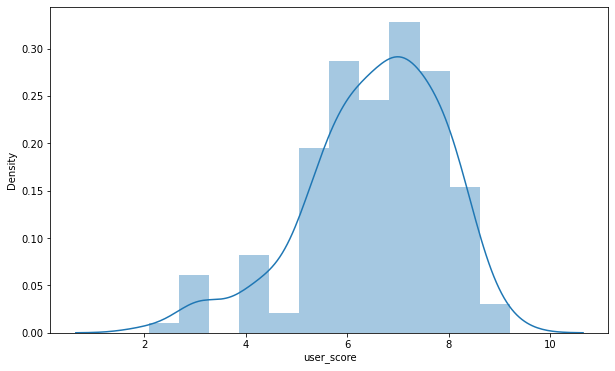

In [91]:
plt.figure(figsize=(10,6))
sns.distplot(Xbox_data['user_score']);

In [92]:
mean_Xbox = Xbox_data['user_score'].mean()
print('Среднее значение пользовательского рейтинга платформы XOne:',mean_Xbox)

Среднее значение пользовательского рейтинга платформы XOne: 6.538181818181818


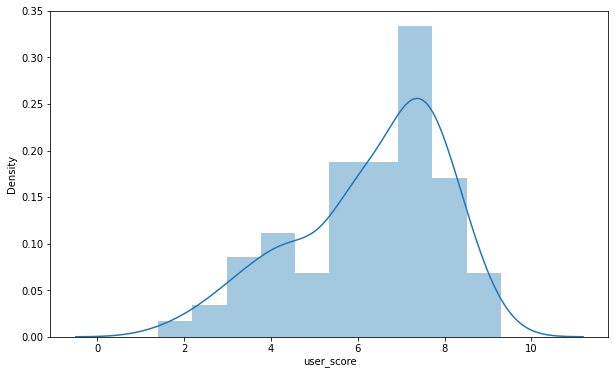

In [93]:
plt.figure(figsize=(10,6))
sns.distplot(PC_data['user_score']);

In [94]:
mean_PC = PC_data['user_score'].mean()
print('Среднее значение пользовательского рейтинга платформы PC:',mean_PC)

Среднее значение пользовательского рейтинга платформы PC: 6.3020270270270276


In [95]:
xone = Xbox_data.query('platform == "XOne"')['user_score']
pc = PC_data.query('platform == "PC"')['user_score']

alpha = .01

results = st.ttest_ind(
    xone, 
    pc, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.17882648263401307
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

**Проверка показала, что гипотезу о равенстве среднего пользовательского рейтинга для Xbox One и PC не получилось отвергнуть**

### Средние пользовательские рейтинги жанров Action и Sports разные.

**Гипотезы:**
- Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.
- Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

In [96]:
Action_data = actual_platform_data.query('genre=="action" and (user_score != -1)')
Sports_data = actual_platform_data.query('genre=="sports" and (user_score != -1)')

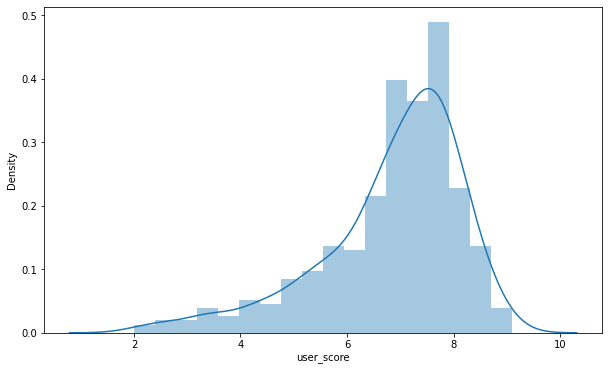

In [97]:
plt.figure(figsize=(10,6))
sns.distplot(Action_data['user_score']);

In [98]:
mean_action = Action_data['user_score'].mean()
print('Среднее значение пользовательского рейтинга жанра Action:',mean_action)

Среднее значение пользовательского рейтинга жанра Action: 6.837532133676092


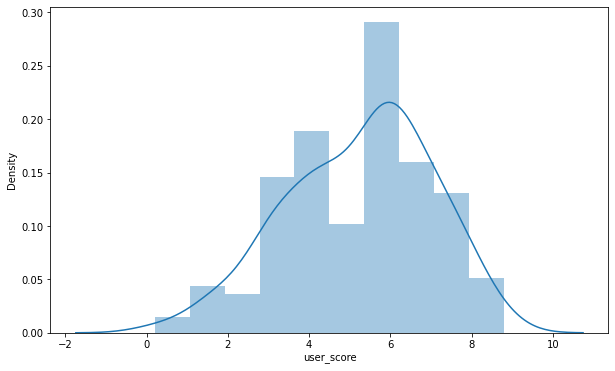

In [99]:
plt.figure(figsize=(10,6))
sns.distplot(Sports_data['user_score']);

In [100]:
mean_sports = Sports_data['user_score'].mean()
print('Среднее значение пользовательского рейтинга жанра Sports:',mean_action)

Среднее значение пользовательского рейтинга жанра Sports: 6.837532133676092


In [101]:
action = Action_data.query('genre == "action"')['user_score']
sports = Sports_data.query('genre == "sports"')['user_score']

alpha = .01

results = st.ttest_ind(
    action, 
    sports, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


**Вывод:**

**Проверка показала, что мы отвергаем гипотезу о разности среднего пользовательского рейтинга для жанров Action и Sports**

### Вывод

**Проверка гипотез начинается с формулировки нулевой гипотезы, которые были сформулированы условием задания**

**Исходя из нулевой формулируется альтернативная гипотеза, противополажная по значению**

**Для этого нужно посчитать вероятность получить наблюдаемое на выборке значение (чаще всего, среднее) при условии, что нулевая гипотеза верна. Если вероятность меньше — отвергаем нулевую гипотезу**

**В первом задании проверка показала, что не получилось отвергнуть нулевую гипотезу о равенстве среднего пользовательского рейтинга для Xbox One и PC**

**Во втором задании проверка показала, что мы отвергаем нулевую гипотезу о разности среднего пользовательского рейтинга для жанров Action и Sports**

## Шаг. Общий вывод

**Данные прошли предобработку, с ними можно работать**

**Посчитали сумарные продажи по всем регионам**

**Большего всего игр выпускалось с 2006 по 2011 года**

**Средняя длина жизни платформы составляет 10, пик популярности посередине, далее идет на спад**

**Самыми популярными платформами были PS3 и Xbox One**

**Самая популярная платформама на текущий период PS4**

**Популярные жанры на Западе: Action или Shooter, для Японии - Role-Playing**

**Рейтинг ESRB: E и M для Америки и Европы, для Японии лучше Е**

**Не стоит ориентироваться на оценки пользователей, они не оказывает влияния на продажи. Но вот отзывы критиков не стоит упускать из внимания**

**Средний пользовательский рейтинг для Xbox One и PC одинаковы**

**Средний пользовательский рейтинг для жанров Action и Sports одинаковы**